In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
input_path_A = input("Entre com o path da 1ª imagem de entrada: ")
input_path_B = input("Entre com o path da 2ª imagem de entrada: ")
output_path = input("Entre com o path da pasta de saída (esta pasta deve existir): ")

In [3]:
# read images as grayscale
img_A = cv2.imread(input_path_A, 0)
img_B = cv2.imread(input_path_B, 0)

In [4]:
orb = cv2.ORB_create()

In [5]:
# get descriptors using orb
kp_A_orb, des_A_orb = orb.detectAndCompute(img_A,None)
kp_B_orb, des_B_orb = orb.detectAndCompute(img_B,None)

kpA: 500
kpB: 500


In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [7]:
matches = bf.match(des_A_orb,des_B_orb)
matches = sorted(matches, key = lambda x:x.distance)

matches: 280


In [8]:
max = int(input('Entre com o valor máximo de distância tolerável para os matches: '))
good_matches = []
for m in matches:
    if m.distance < max:
        good_matches.append(m)

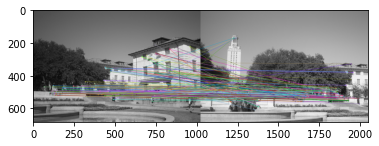

(<matplotlib.image.AxesImage at 0x7fd557634750>, None)

In [9]:
img_C = cv2.drawMatches(img_A, kp_A_orb, img_B, kp_B_orb, good_matches, None, flags=2)
plt.imshow(img_C),plt.show()

In [10]:
src_pts = np.float32([ kp_A_orb[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp_B_orb[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [11]:
width = img_A.shape[1] + img_B.shape[1]
height = img_A.shape[0] + img_B.shape[0]

In [12]:
img_out = cv2.warpPerspective(img_A, H, (width, height))
img_out[0:img_B.shape[0], 0:img_B.shape[1]] = img_B

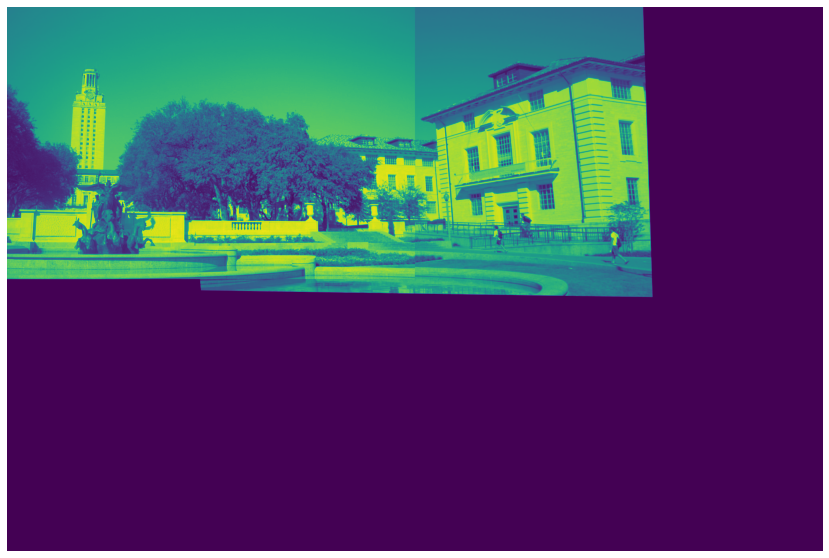

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(img_out)

plt.axis('off')
plt.show()

In [14]:
cv2.imwrite(output_path + '/orb.jpg', img_out)

True